# 기본세팅

In [1]:
%cd drive/MyDrive/Colab\ Notebooks/HouseholdDebt

/content/drive/MyDrive/Colab Notebooks/HouseholdDebt


In [2]:
import numpy as np

# 한글 세팅

In [3]:
!sudo apt-get update -qq
!sudo apt-get install fonts-nanum* -qq

In [4]:
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [5]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

NanumBarunGothic


In [6]:
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

In [7]:
import seaborn as sns

In [8]:
sns.set(font=font_name, 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [9]:
import pandas as pd

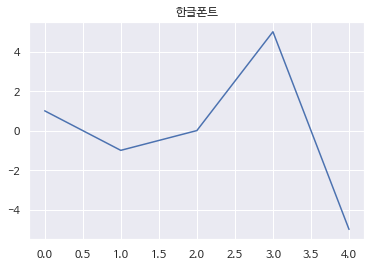

In [10]:
pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")
None

# 함수

In [11]:
def convert_to_yoy(df):
  a = np.array(df)
  df_yoy = pd.DataFrame(data=((a[4:] - a[:-4]) / a[:-4]) ,index=df.index[4:], columns=df.columns)
  return df_yoy

In [34]:
def convert_to_qoq(df):
  a = np.array(df)
  df_qoq = pd.DataFrame(data=((a[1:] - a[:-1]) / a[:-1]) ,index=df.index[1:], columns=df.columns)
  return df_qoq

# 가계대출

In [ ]:
#df = pd.read_csv('data/2110059_20220113180614.csv')
df = pd.read_csv('data/house_loan.csv')
df['1인당 대출금'] = df['대출금액합계<미적용, 십만원>'] / df['차주수합계<미적용, 명>']

In [ ]:
df

기준분기     연령대 성별구분  ...  대출금액합계<미적용, 십만원> 차주수합계<미적용, 명>     1인당 대출금
0       2010Q1     20대   남자  ...                60             6   10.000000
1       2010Q1     20대   남자  ...              2679            64   41.859375
2       2010Q1     20대   남자  ...              4988            97   51.422680
3       2010Q1     20대   남자  ...               363             1  363.000000
4       2010Q1     20대   남자  ...                80             1   80.000000
...        ...     ...  ...  ...               ...           ...         ...
143482  2021Q3  70세 이상   여자  ...              6591            87   75.758621
143483  2021Q3  70세 이상   여자  ...               149             5   29.800000
143484  2021Q3  70세 이상   여자  ...              1374            10  137.400000
143485  2021Q3  70세 이상   여자  ...               712             3  237.333333
143486  2021Q3  70세 이상   여자  ...                 0             0         NaN

[143487 rows x 10 columns]

In [ ]:
quater_list = list(df['기준분기'].unique())
age_list = list(df['연령대'].unique())
income_level_list = list(df['소득추정등급'].unique())

## 대출금액

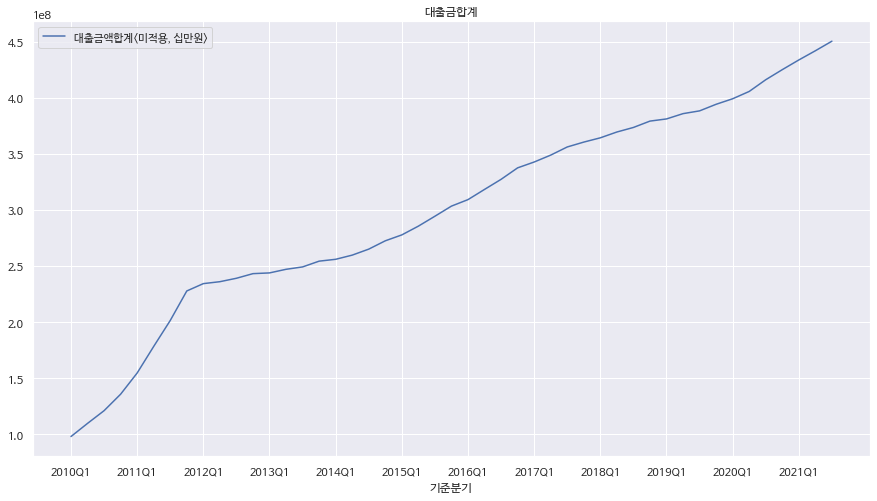

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df.groupby('기준분기').sum()[['대출금액합계<미적용, 십만원>']])
ax.set_title('대출금합계')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [ ]:
total_debt = pd.DataFrame(index=quater_list)
for age in age_list:
  total_debt[age] = df[df['연령대'] == age].groupby('기준분기').sum()['대출금액합계<미적용, 십만원>']

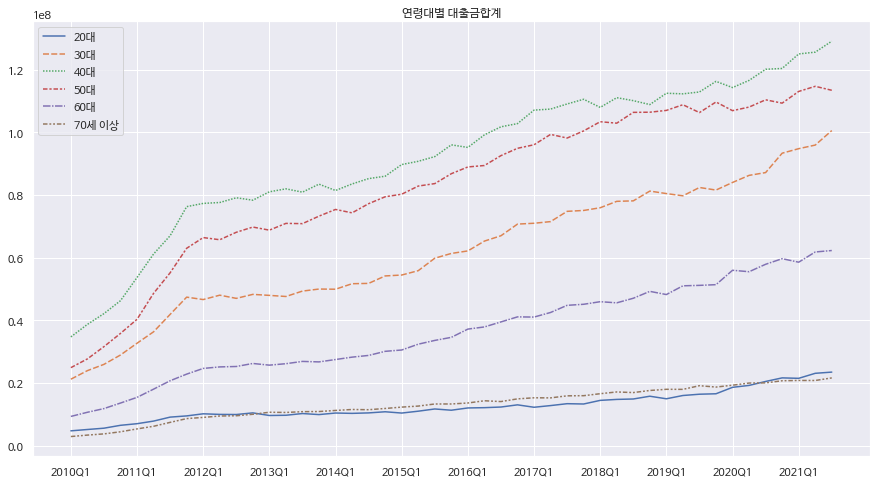

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=total_debt)
ax.set_title('연령대별 대출금합계')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [ ]:
total_debt_yoy = convert_to_yoy(total_debt)

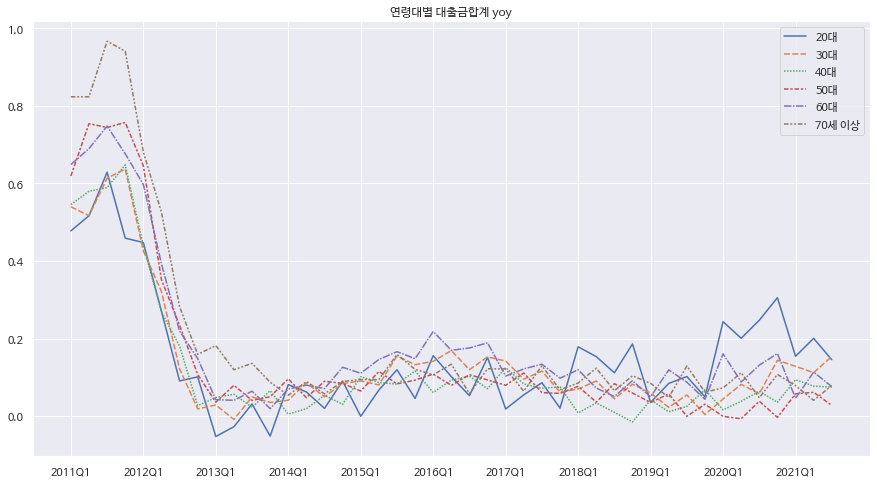

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=total_debt_yoy)
ax.set_title('연령대별 대출금합계 yoy')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [ ]:
total_debt_yoy[-7:].mean()

20대       0.213830
30대       0.103113
40대       0.057099
50대       0.024782
60대       0.110947
70세 이상    0.076702
dtype: float64

In [ ]:
total_debt = pd.DataFrame(index=quater_list)
for income_level in income_level_list:
  total_debt[income_level] = df[df['소득추정등급'] == income_level].groupby('기준분기').sum()['대출금액합계<미적용, 십만원>']

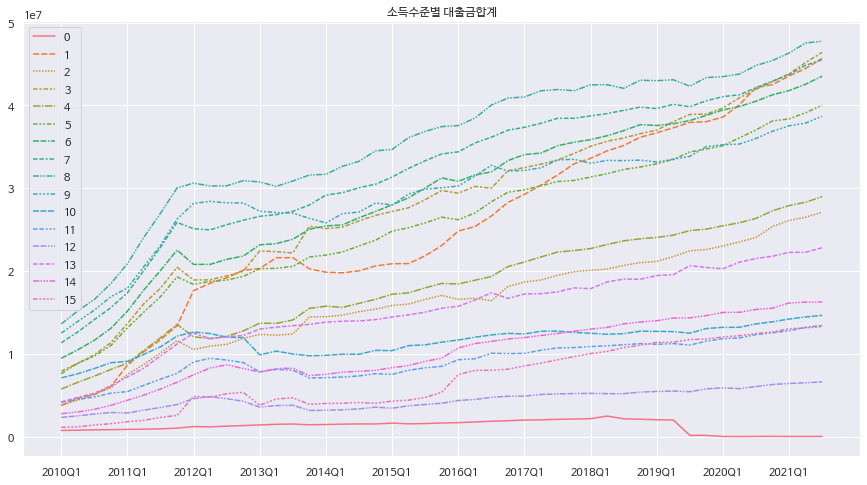

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=total_debt)
ax.set_title('소득수준별 대출금합계')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

### 20대

In [ ]:
total_debt = pd.DataFrame(index=quater_list)
for income_level in income_level_list:
  total_debt[income_level] = df[(df['연령대'] == '20대') & (df['소득추정등급'] == income_level)].groupby('기준분기').sum()['대출금액합계<미적용, 십만원>']

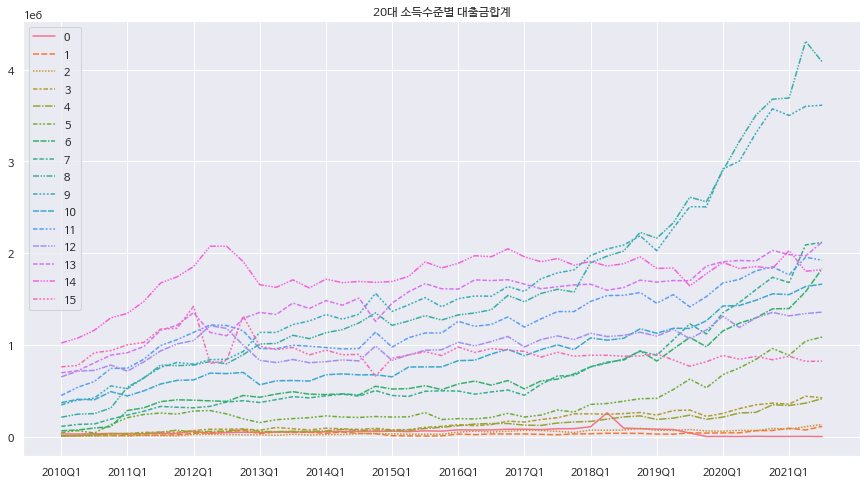

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=total_debt)
ax.set_title('20대 소득수준별 대출금합계')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

### 30대

In [ ]:
total_debt = pd.DataFrame(index=quater_list)
for income_level in income_level_list:
  total_debt[income_level] = df[(df['연령대'] == '30대') & (df['소득추정등급'] == income_level)].groupby('기준분기').sum()['대출금액합계<미적용, 십만원>']

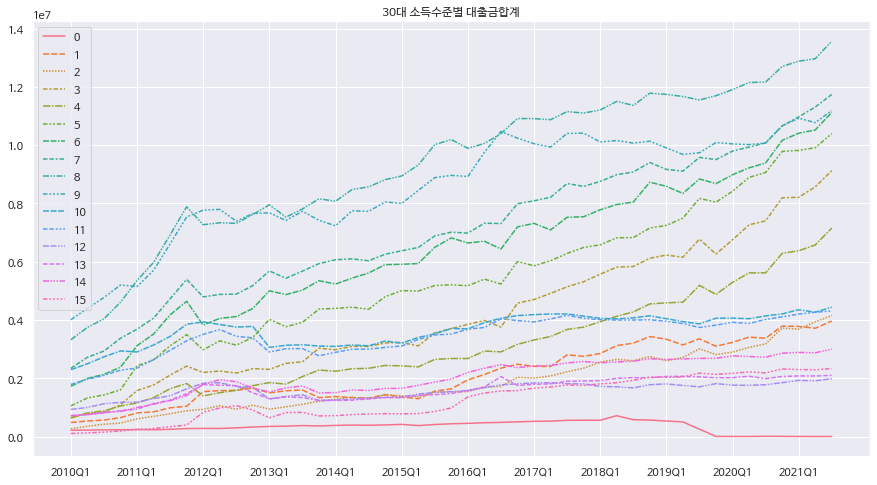

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=total_debt)
ax.set_title('30대 소득수준별 대출금합계')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

## 차주수

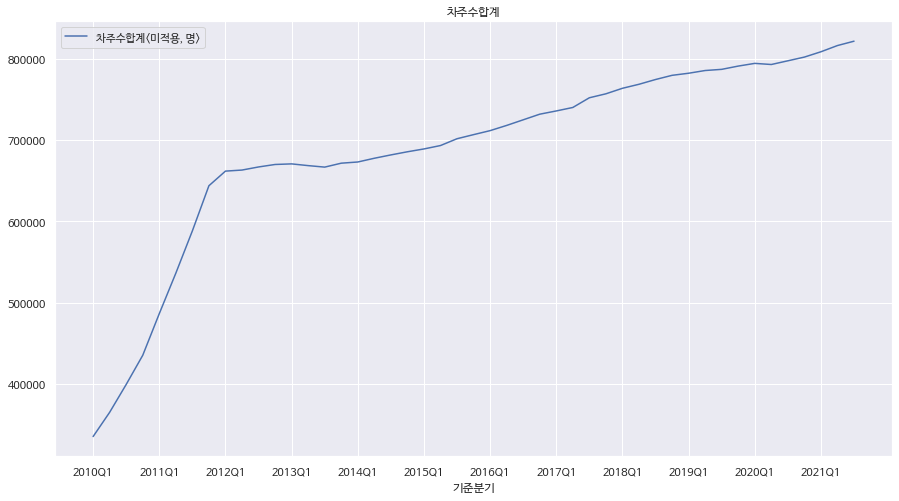

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df.groupby('기준분기').sum()[['차주수합계<미적용, 명>']])
ax.set_title('차주수합계')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [ ]:
total_borrower = pd.DataFrame(index=quater_list)
for age in age_list:
  total_borrower[age] = df[df['연령대'] == age].groupby('기준분기').sum()['차주수합계<미적용, 명>']

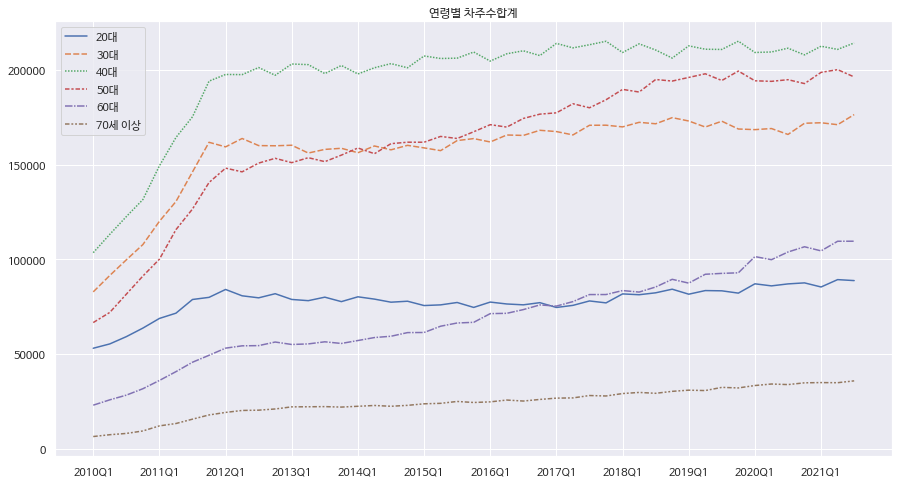

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=total_borrower)
ax.set_title('연령별 차주수합계')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [ ]:
total_borrower_yoy = convert_to_yoy(total_borrower)

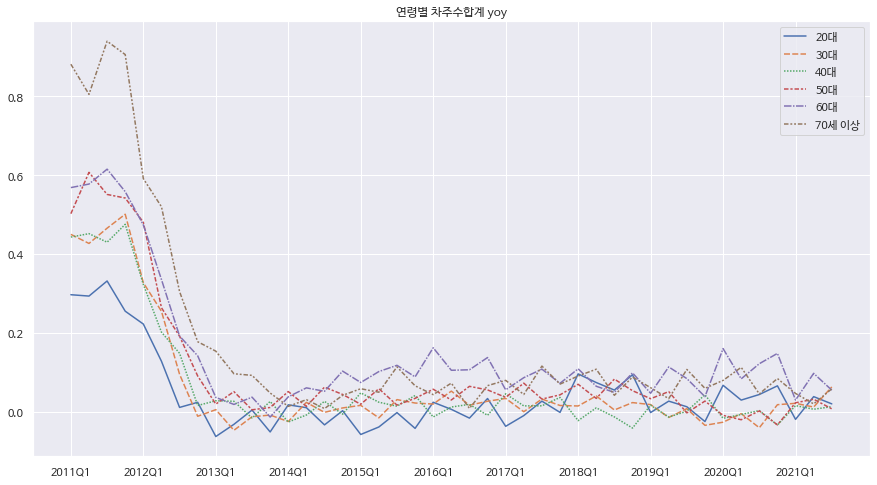

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=total_borrower_yoy)
ax.set_title('연령별 차주수합계 yoy')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [ ]:
total_borrower = pd.DataFrame(index=quater_list)
for income_level in income_level_list:
  total_borrower[income_level] = df[df['소득추정등급'] == income_level].groupby('기준분기').sum()['차주수합계<미적용, 명>']

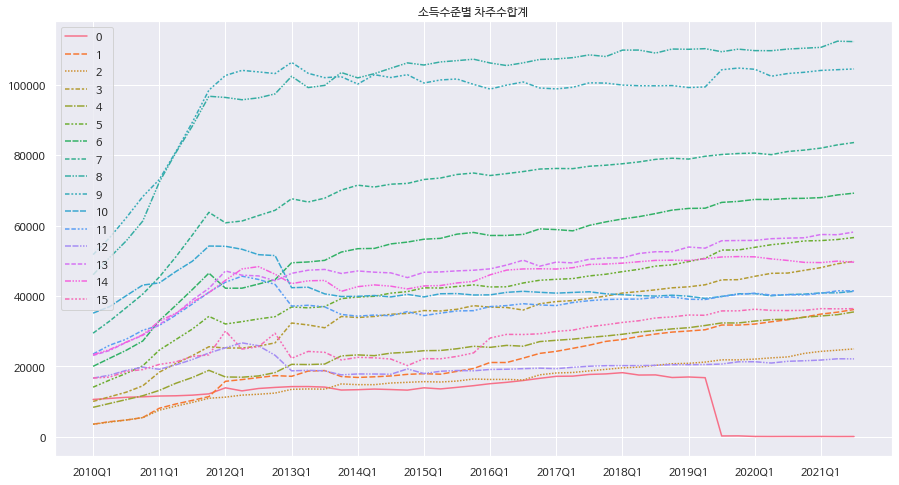

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=total_borrower)
ax.set_title('소득수준별 차주수합계')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

## 1인당 대출금액

In [ ]:
loan_per_person = pd.DataFrame(index=quater_list)
for age in age_list:
  loan_per_person[age] = df[df['연령대'] == age].groupby('기준분기').sum()['1인당 대출금']

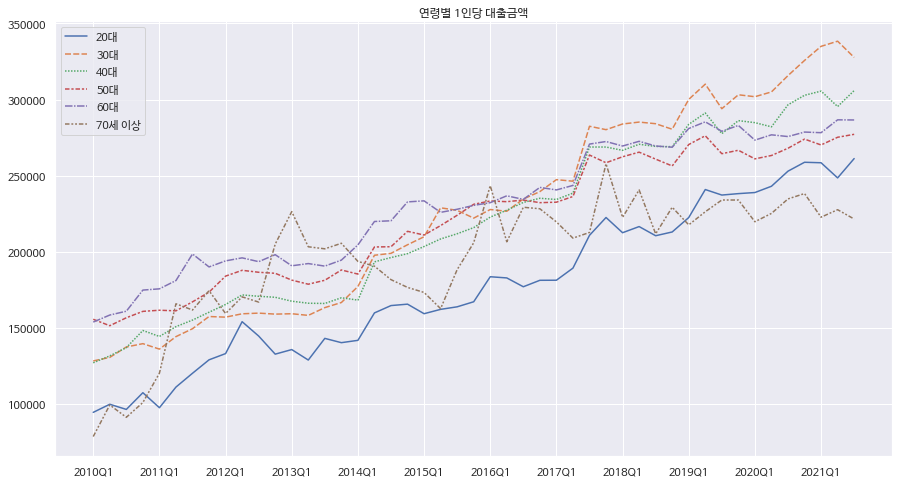

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=loan_per_person)
ax.set_title('연령별 1인당 대출금액')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [ ]:
loan_per_person_yoy = convert_to_yoy(loan_per_person)

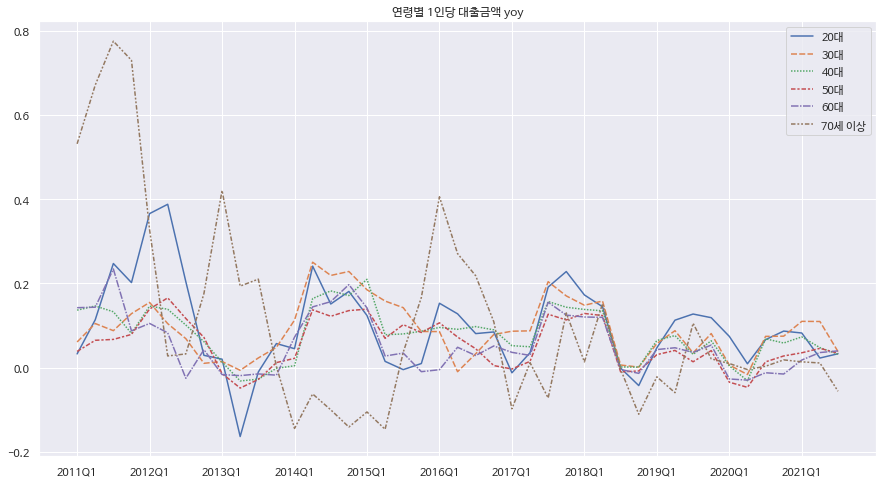

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=loan_per_person_yoy)
ax.set_title('연령별 1인당 대출금액 yoy')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [ ]:
loan_per_person_yoy[-7:].mean()

20대       0.053304
30대       0.056403
40대       0.035844
50대       0.010573
60대       0.001172
70세 이상   -0.000860
dtype: float64

## 소득대비부채비율

In [ ]:
df_loan = pd.read_csv('data/house_loan_v2.csv')

In [ ]:
df_loan.columns

Index(['기준분기', '연령대', '성별구분', '소득추정등급', '상품구분(KFB)명_대분류', '상품구분(KFB)명_소분류',
       '상품구분(KFB)명', '총금액 <Sum>', '개인일련번호(식별키) <Count>', '소득추정금액 <Sum>'],
      dtype='object')

In [ ]:
df = pd.DataFrame(index=quater_list)
for age in age_list:
  df[age] = df_loan[df_loan['연령대'] == age].groupby('기준분기').sum()['총금액 <Sum>'] / df_loan[df_loan['연령대'] == age].groupby('기준분기').sum()['소득추정금액 <Sum>']

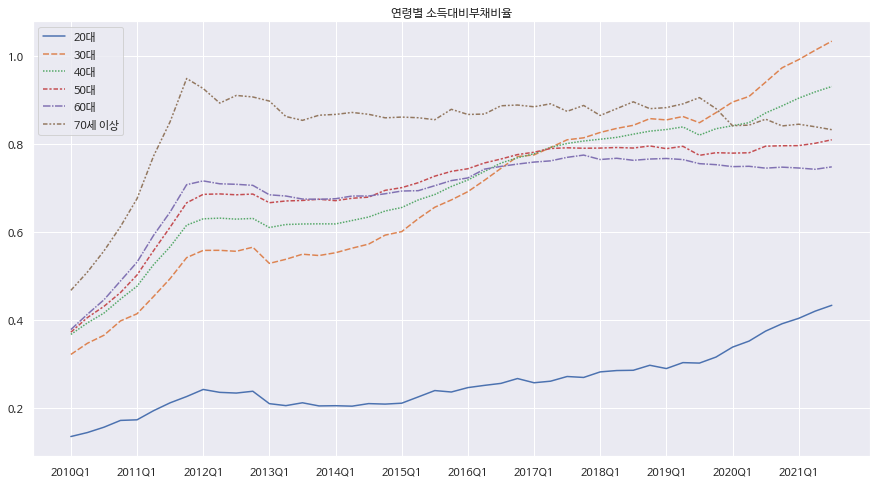

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df)
ax.set_title('연령별 소득대비부채비율')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [ ]:
df_yoy = convert_to_yoy(df)

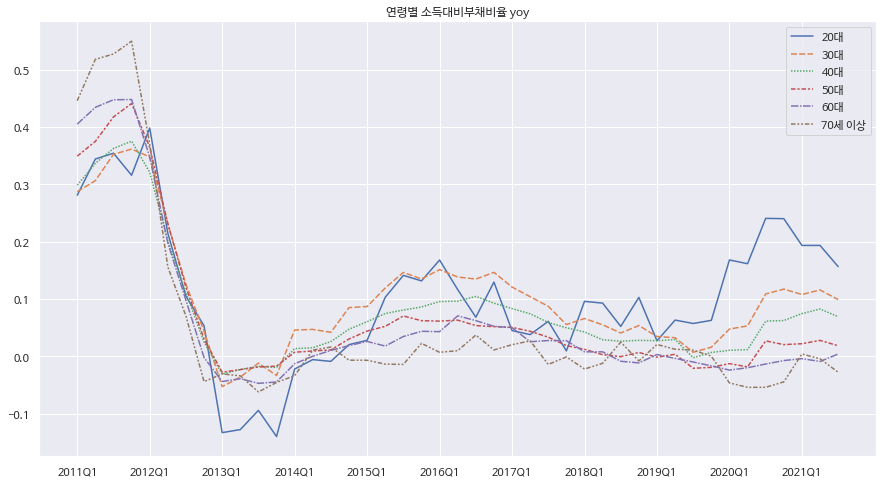

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_yoy)
ax.set_title('연령별 소득대비부채비율 yoy')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

# 연령별 가계대출금액 상품별 구성

## 20대

In [ ]:
df_loan = pd.read_csv('data/house_loan.csv')

In [ ]:
quarter_list = list(df_loan['기준분기'].unique())

In [ ]:
age_list = list(df_loan['연령대'].unique())
income_level_list = list(df_loan['소득추정등급'].unique())
product_list = list(df_loan['상품구분(KFB)명'].unique())

In [ ]:
df = pd.DataFrame(index=quarter_list)
for product in product_list:
  df[product] = df_loan[(df_loan['연령대'] == '20대') & (df_loan['상품구분(KFB)명'] == product)].groupby('기준분기').sum()['대출금액합계<미적용, 십만원>']

In [ ]:
df = df.drop(columns=['-'])

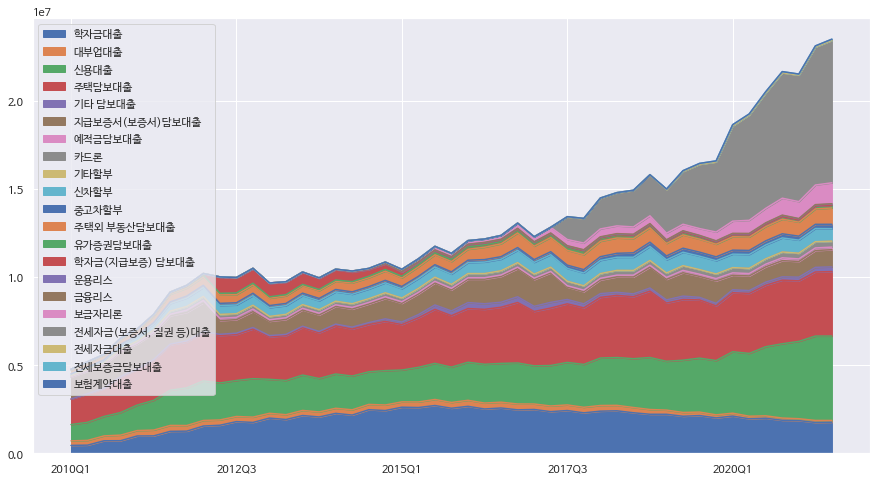

In [ ]:
df.plot.area(figsize=(15, 8))

## 30대

In [ ]:
df = pd.DataFrame(index=quarter_list)
for product in product_list:
  df[product] = df_loan[(df_loan['연령대'] == '30대') & (df_loan['상품구분(KFB)명'] == product)].groupby('기준분기').sum()['대출금액합계<미적용, 십만원>']

In [ ]:
df = df.drop(columns=['-'])

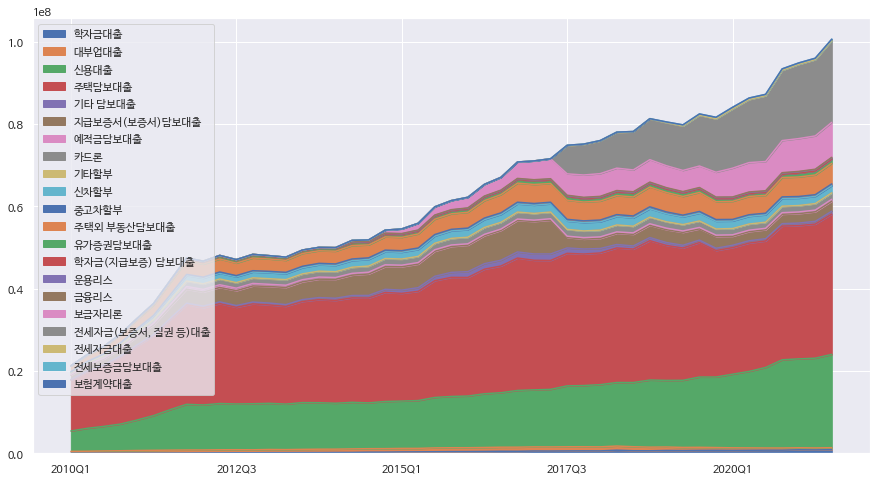

In [ ]:
df.plot.area(figsize=(15, 8))

## 40대 이상

In [ ]:
df = pd.DataFrame(index=quarter_list)
for product in product_list:
  df[product] = df_loan[(df_loan['연령대'].isin(['30대', '40대', '50대', '60대', '70대 이상'])) & (df_loan['상품구분(KFB)명'] == product)].groupby('기준분기').sum()['대출금액합계<미적용, 십만원>']

In [ ]:
df = df.drop(columns=['-'])

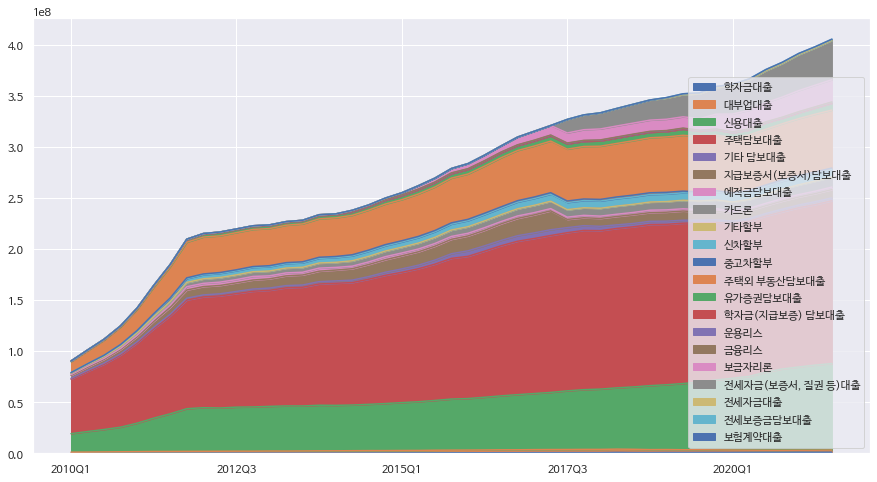

In [ ]:
df.plot.area(figsize=(15, 8))

# 연령별 차주수 상품별 구성

## 20대

In [ ]:
df_loan = pd.read_csv('data/house_loan_v2.csv')

In [ ]:
df_loan.columns

Index(['기준분기', '연령대', '성별구분', '소득추정등급', '상품구분(KFB)명_대분류', '상품구분(KFB)명_소분류',
       '상품구분(KFB)명', '총금액 <Sum>', '개인일련번호(식별키) <Count>', '소득추정금액 <Sum>'],
      dtype='object')

In [ ]:
quarter_list = list(df_loan['기준분기'].unique())

In [ ]:
age_list = list(df_loan['연령대'].unique())
income_level_list = list(df_loan['소득추정등급'].unique())
product_list = list(df_loan['상품구분(KFB)명'].unique())

In [ ]:
df = pd.DataFrame(index=quarter_list)
for product in product_list:
  df[product] = df_loan[(df_loan['연령대'] == '20대') & (df_loan['상품구분(KFB)명'] == product)].groupby('기준분기').sum()['개인일련번호(식별키) <Count>']

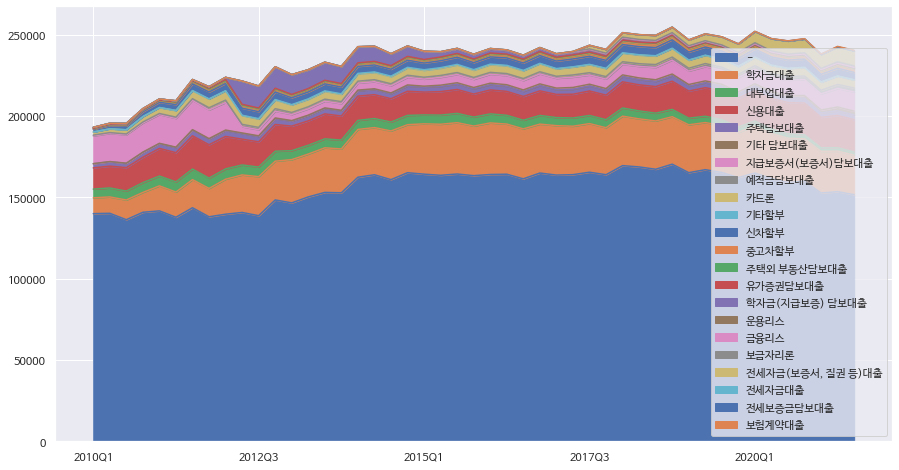

In [ ]:
df.plot.area(figsize=(15, 8))

# 전세대출

In [ ]:
df_loan = pd.read_csv('data/house_loan.csv')

In [ ]:
df_loan['1인당 대출금'] = df_loan['대출금액합계<미적용, 십만원>'] / df_loan['차주수합계<미적용, 명>']

In [ ]:
quarter_index = list(df_loan['기준분기'].unique())[30:]

In [ ]:
quarter_index

['2017Q3',
 '2017Q4',
 '2018Q1',
 '2018Q2',
 '2018Q3',
 '2018Q4',
 '2019Q1',
 '2019Q2',
 '2019Q3',
 '2019Q4',
 '2020Q1',
 '2020Q2',
 '2020Q3',
 '2020Q4',
 '2021Q1',
 '2021Q2',
 '2021Q3']

In [ ]:
age_list = list(df_loan['연령대'].unique())
income_level_list = list(df_loan['소득추정등급'].unique())

## 대출금액

In [ ]:
df = pd.DataFrame(index=quarter_index)
for age in age_list:
  df[age] = list(df_loan[(df_loan['연령대'] == age) & (df_loan['상품구분(KFB)명'].isin(['전세자금(보증서, 질권 등)대출', '전세자금대출', '전세보증금담보대출']))].groupby('기준분기').sum()['대출금액합계<미적용, 십만원>'])

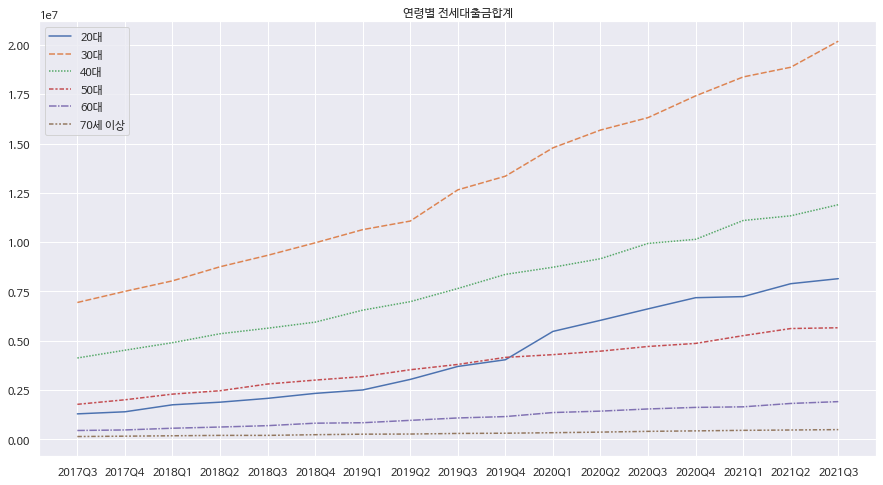

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df)
ax.set_title('연령별 전세대출금합계')
xticks=ax.xaxis.get_major_ticks()
plt.show()
None

In [ ]:
a = np.array(df)

In [ ]:
a.shape

(17, 6)

In [ ]:
df_yoy = pd.DataFrame(data=((a[4:] - a[:-4]) / a[:-4]) ,index=pd.date_range(start='2018-09-30', end='2021-09-30', freq='Q'), columns=age_list)

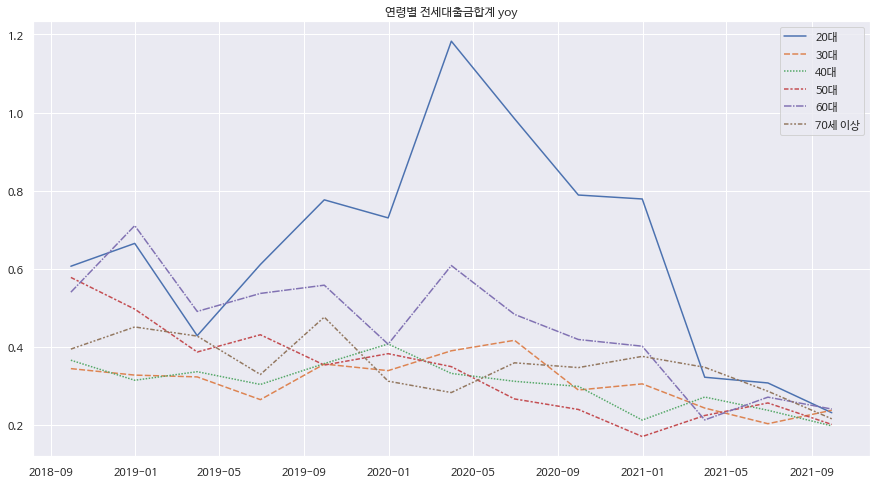

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_yoy)
ax.set_title('연령별 전세대출금합계 yoy')
xticks=ax.xaxis.get_major_ticks()
plt.show()
None

## 차주수

In [ ]:
df = pd.DataFrame(index=quarter_index)
for age in age_list:
  df[age] = list(df_loan[(df_loan['연령대'] == age) & (df_loan['상품구분(KFB)명'].isin(['전세자금(보증서, 질권 등)대출', '전세자금대출', '전세보증금담보대출']))].groupby('기준분기').sum()['차주수합계<미적용, 명>'])

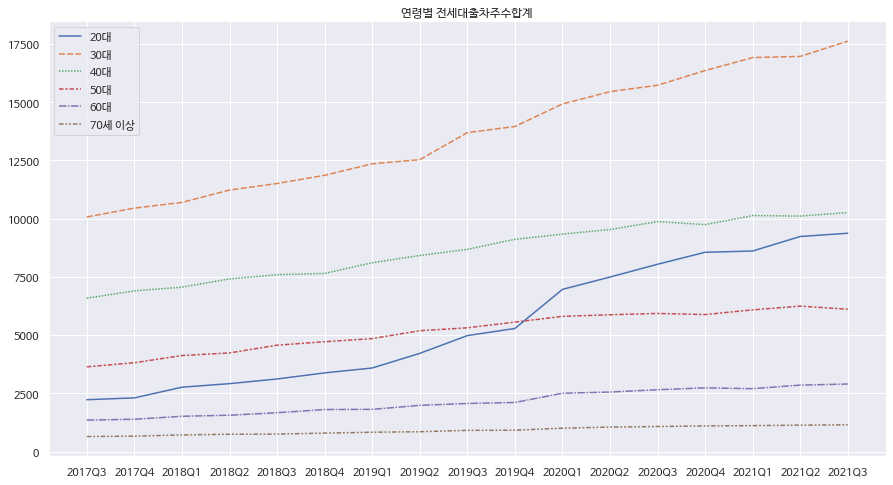

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df)
ax.set_title('연령별 전세대출차주수합계')
xticks=ax.xaxis.get_major_ticks()
plt.show()
None

## 1인당 대출금액

In [ ]:
df = pd.DataFrame(index=quarter_index)
for age in age_list:
  df[age] = list(df_loan[(df_loan['연령대'] == age) & (df_loan['상품구분(KFB)명'].isin(['전세자금(보증서, 질권 등)대출', '전세자금대출', '전세보증금담보대출']))].groupby('기준분기').sum()['1인당 대출금'])

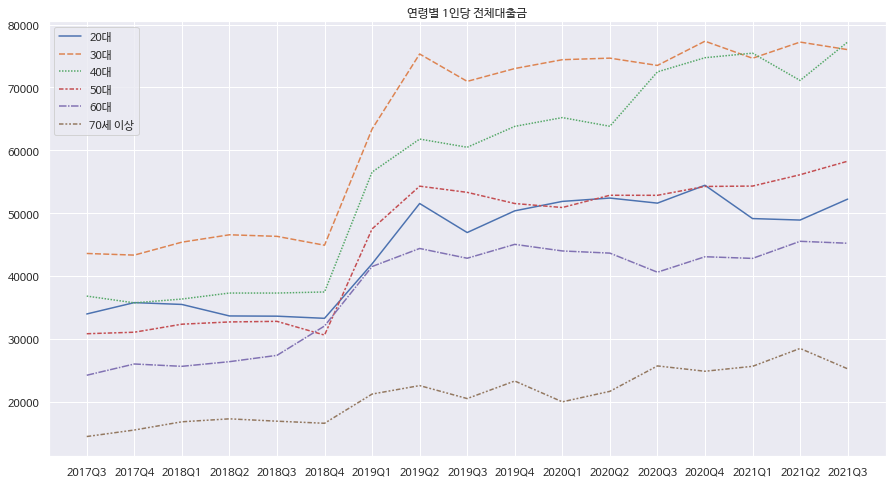

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df)
ax.set_title('연령별 1인당 전체대출금')
xticks=ax.xaxis.get_major_ticks()
plt.show()
None

In [ ]:
df_yoy = convert_to_yoy(df)

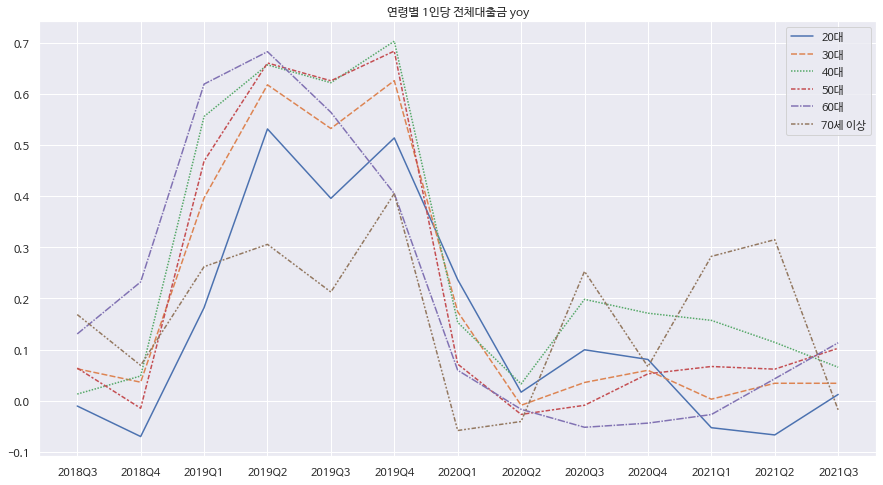

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_yoy)
ax.set_title('연령별 1인당 전체대출금 yoy')
xticks=ax.xaxis.get_major_ticks()
plt.show()
None

## 소득대비부채비율

In [ ]:
df_loan = pd.read_csv('data/house_loan_v2.csv')

In [ ]:
df = pd.DataFrame(index=quarter_index)
for age in age_list:
  df[age] = df_loan[(df_loan['연령대'] == age) & (df_loan['상품구분(KFB)명'].isin(['전세자금(보증서, 질권 등)대출', '전세자금대출', '전세보증금담보대출']))].groupby('기준분기').sum()['총금액 <Sum>'] / df_loan[(df_loan['연령대'] == age) & (df_loan['상품구분(KFB)명'].isin(['전세자금(보증서, 질권 등)대출', '전세자금대출', '전세보증금담보대출']))].groupby('기준분기').sum()['소득추정금액 <Sum>']

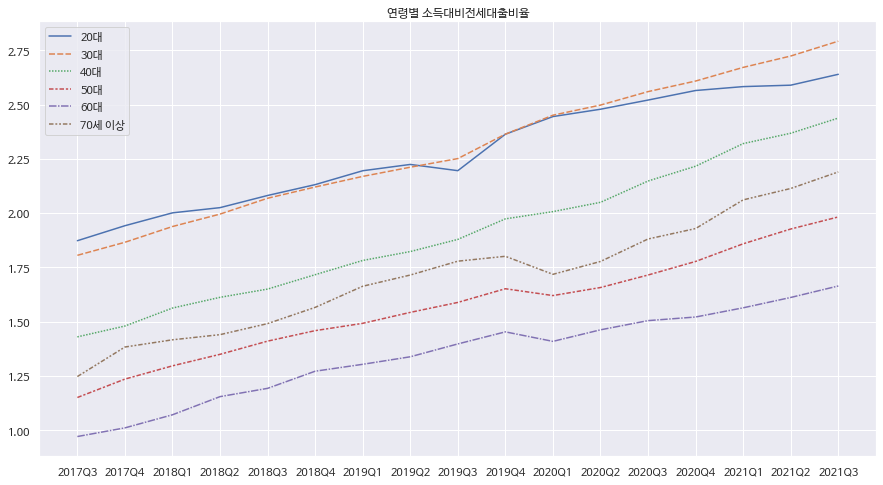

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df)
ax.set_title('연령별 소득대비전세대출비율')
plt.show()
None

In [ ]:
df_yoy = convert_to_yoy(df)

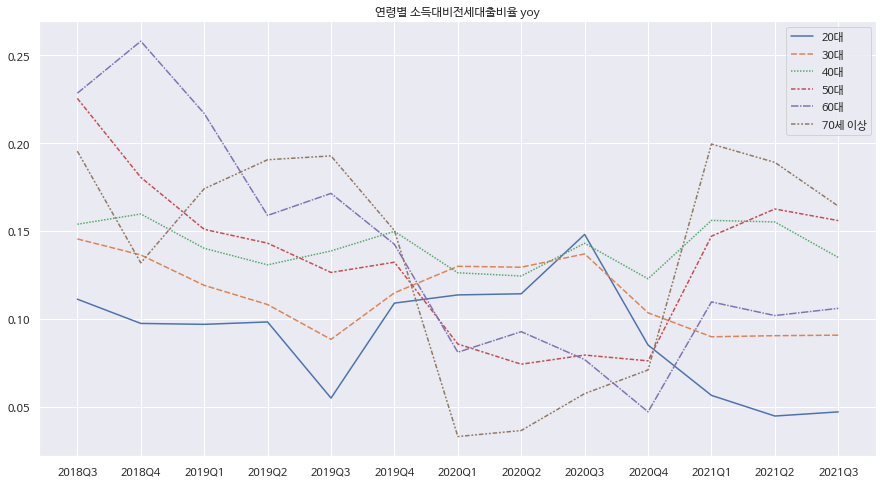

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_yoy)
ax.set_title('연령별 소득대비전세대출비율 yoy')
plt.show()
None

## 차주의 소득 분석

### 20대

In [ ]:
df = pd.DataFrame(index=quarter_list)
for income_level in income_level_list:
  df[income_level] = df_loan[(df_loan['연령대'] == '20대') & (df_loan['소득추정등급'] == income_level) & (df_loan['상품구분(KFB)명'].isin(['전세자금(보증서, 질권 등)대출', '전세자금대출', '전세보증금담보대출']))].groupby('기준분기').sum()['개인일련번호(식별키) <Count>']

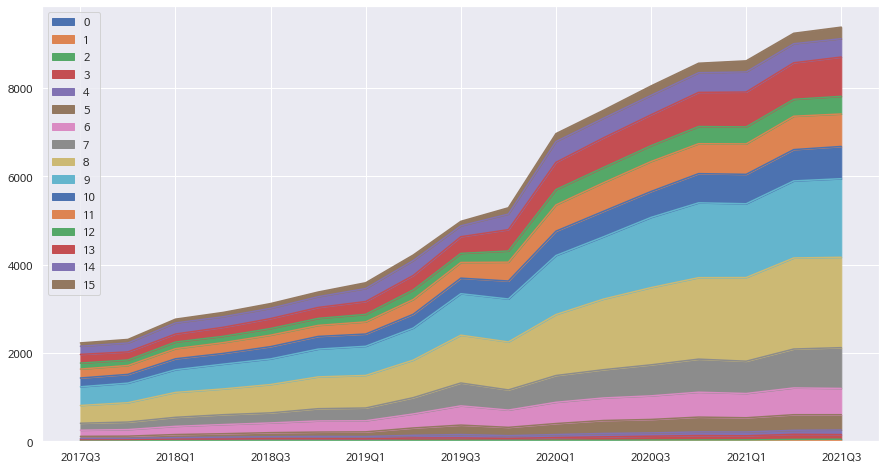

In [ ]:
df[30:].plot.area(figsize=(15, 8))

# 신용대출

In [12]:
df_loan = pd.read_csv('data/house_loan.csv')

In [13]:
df_loan['1인당 대출금'] = df_loan['대출금액합계<미적용, 십만원>'] / df_loan['차주수합계<미적용, 명>']

In [14]:
#quarter_index = pd.date_range(start='2010-03-31', end='2021-09-30', freq='Q')
quarter_index = list(df_loan['기준분기'].unique())

In [15]:
age_list = list(df_loan['연령대'].unique())
income_level_list = list(df_loan['소득추정등급'].unique())

## 대출금액

In [16]:
df = pd.DataFrame(index=quarter_index)
for age in age_list:
  df[age] = list(df_loan[(df_loan['연령대'] == age) & (df_loan['상품구분(KFB)명'] == '신용대출')].groupby('기준분기').sum()['대출금액합계<미적용, 십만원>'])

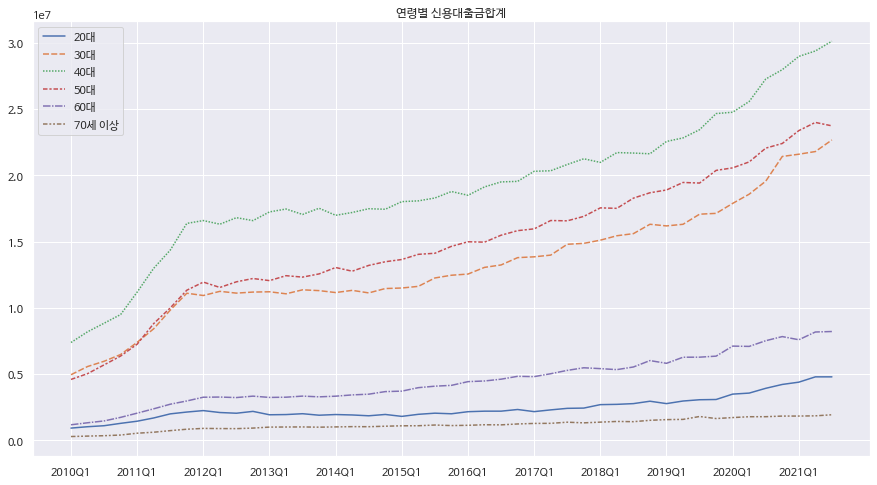

In [17]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df)
ax.set_title('연령별 신용대출금합계')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [18]:
df_yoy = convert_to_yoy(df)

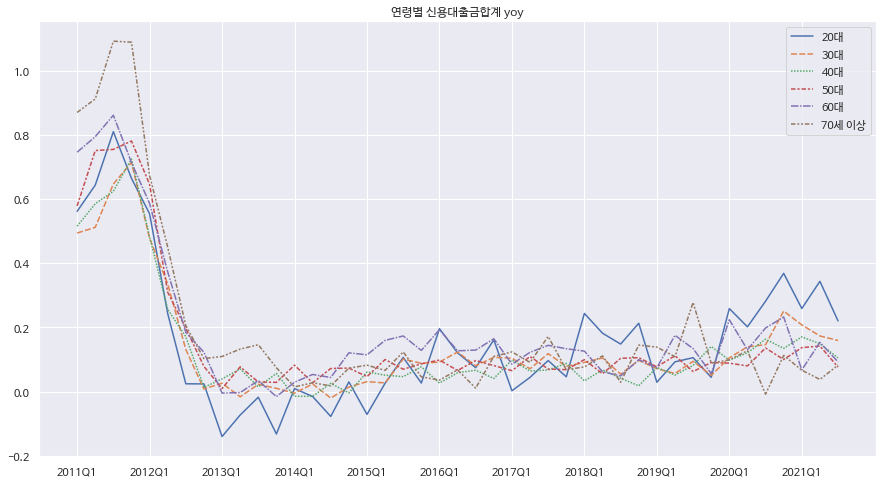

In [19]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_yoy)
ax.set_title('연령별 신용대출금합계 yoy')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

## 차주수

In [20]:
df = pd.DataFrame(index=quarter_index)
for age in age_list:
  df[age] = list(df_loan[(df_loan['연령대'] == age) & (df_loan['상품구분(KFB)명'] == '신용대출')].groupby('기준분기').sum()['차주수합계<미적용, 명>'])

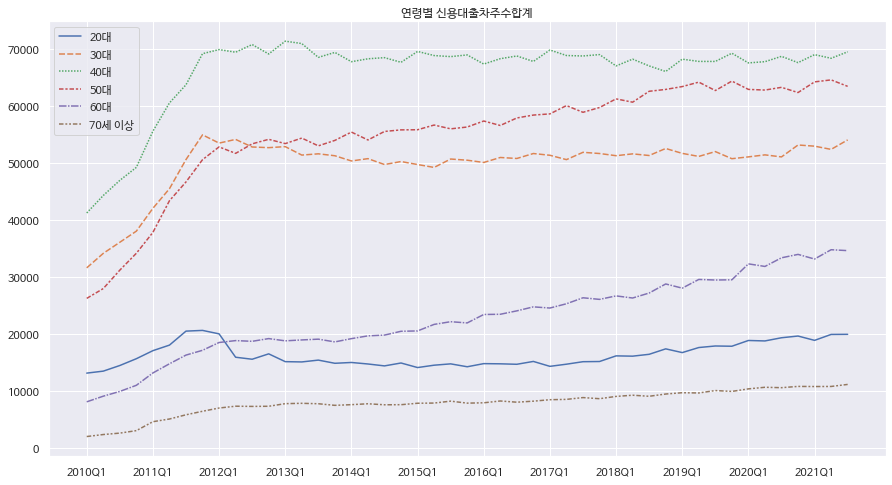

In [21]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df)
ax.set_title('연령별 신용대출차주수합계')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [22]:
df_yoy = convert_to_yoy(df)

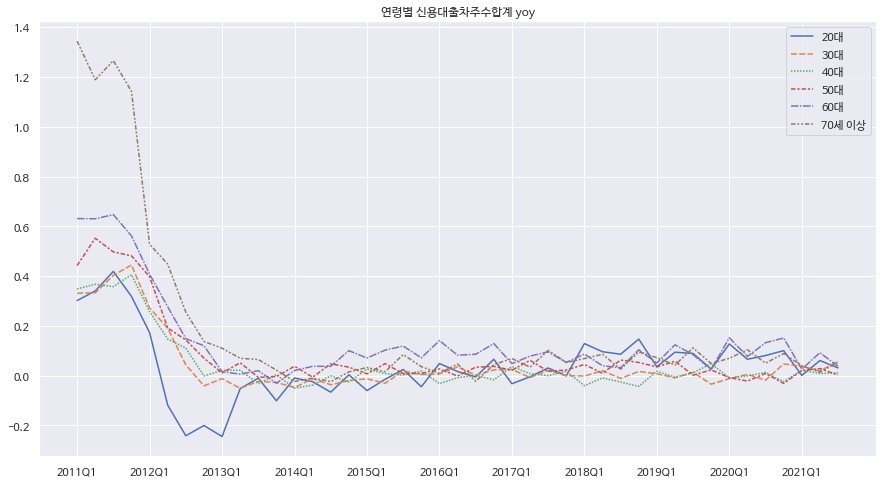

In [23]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_yoy)
ax.set_title('연령별 신용대출차주수합계 yoy')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

## 1인당 대출금액

In [24]:
df = pd.DataFrame(index=quarter_index)
for age in age_list:
  df[age] = list(df_loan[(df_loan['연령대'] == age) & (df_loan['상품구분(KFB)명'] == '신용대출')].groupby('기준분기').sum()['1인당 대출금'])

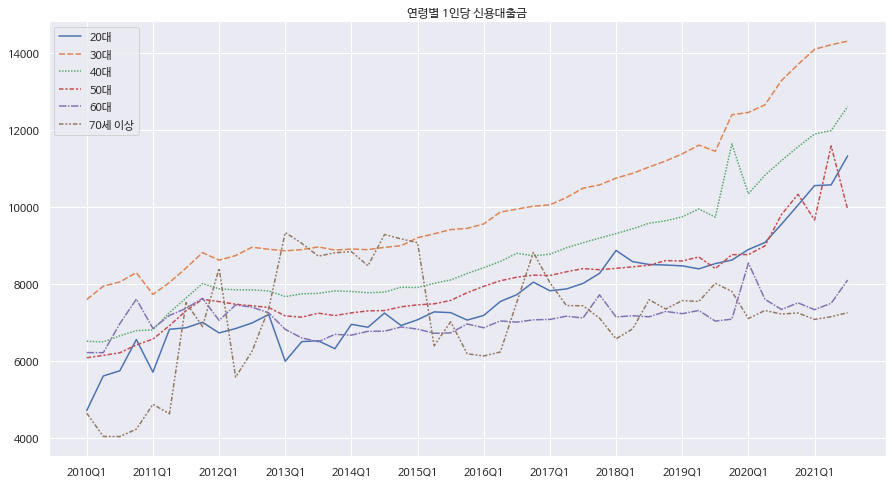

In [25]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df)
ax.set_title('연령별 1인당 신용대출금')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [26]:
df_yoy = convert_to_yoy(df)

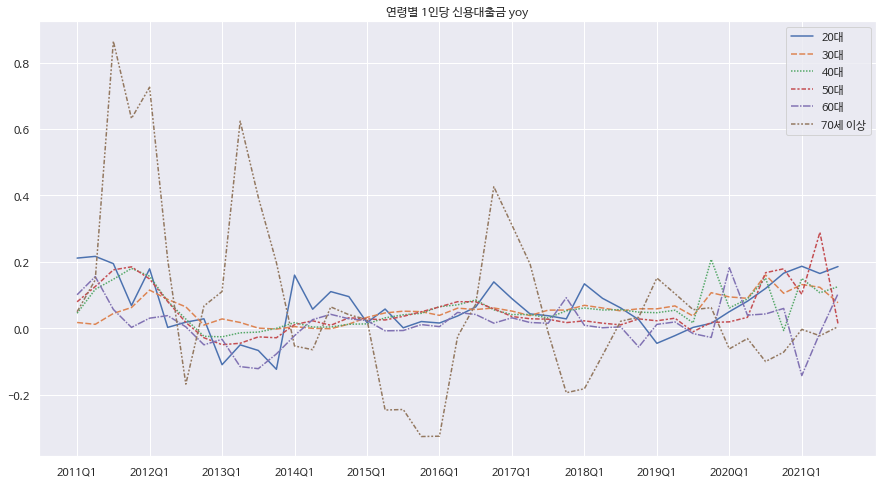

In [27]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_yoy)
ax.set_title('연령별 1인당 신용대출금 yoy')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

### 20대

In [28]:
df = pd.DataFrame(index=quarter_index)
for income_level in income_level_list:
  df[income_level] = df_loan[(df_loan['연령대'] == '20대') & (df_loan['소득추정등급'] == income_level) & (df_loan['상품구분(KFB)명'] == '신용대출')].groupby('기준분기').sum()['1인당 대출금']

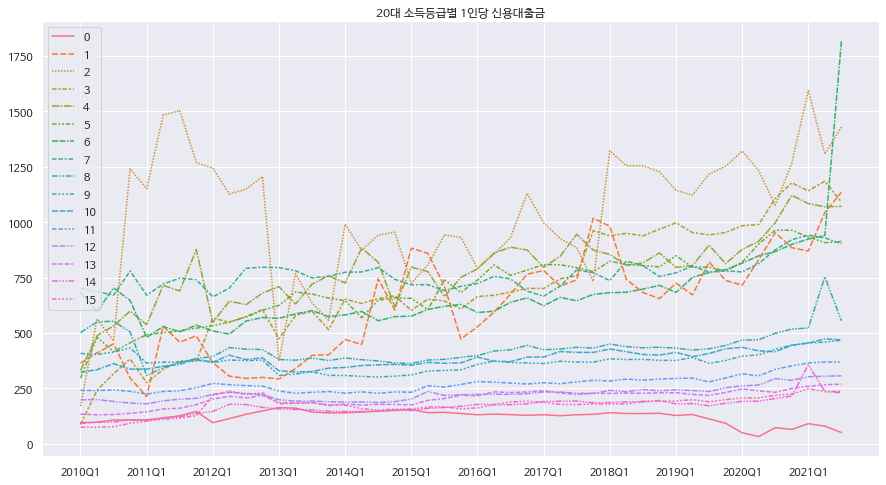

In [29]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df)
ax.set_title('20대 소득등급별 1인당 신용대출금')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

## 소득대비부채비율

In [30]:
df_loan = pd.read_csv('data/house_loan_v2.csv')
df = pd.DataFrame(index=quarter_index)
for age in age_list:
  df[age] = df_loan[(df_loan['연령대'] == age) & (df_loan['상품구분(KFB)명'] == '신용대출')].groupby('기준분기').sum()['총금액 <Sum>'] / df_loan[(df_loan['연령대'] == age) & (df_loan['상품구분(KFB)명'] == '신용대출')].groupby('기준분기').sum()['소득추정금액 <Sum>']

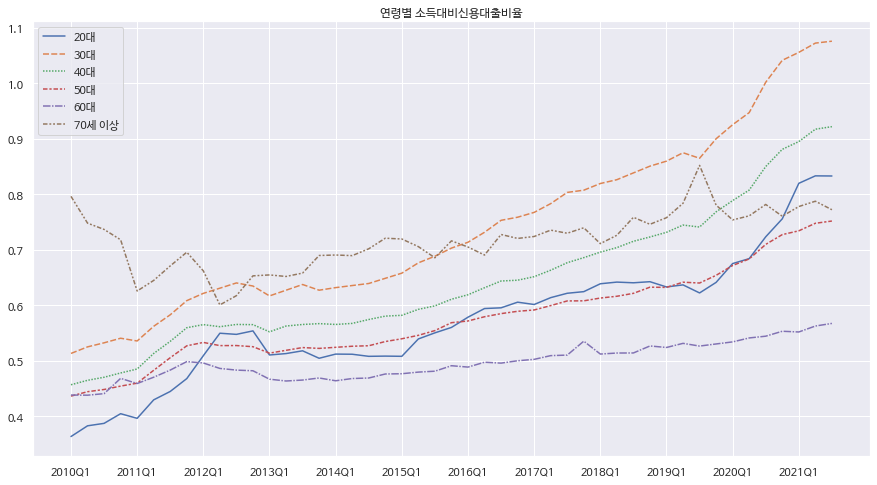

In [31]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df)
ax.set_title('연령별 소득대비신용대출비율')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [32]:
df_yoy = convert_to_yoy(df)

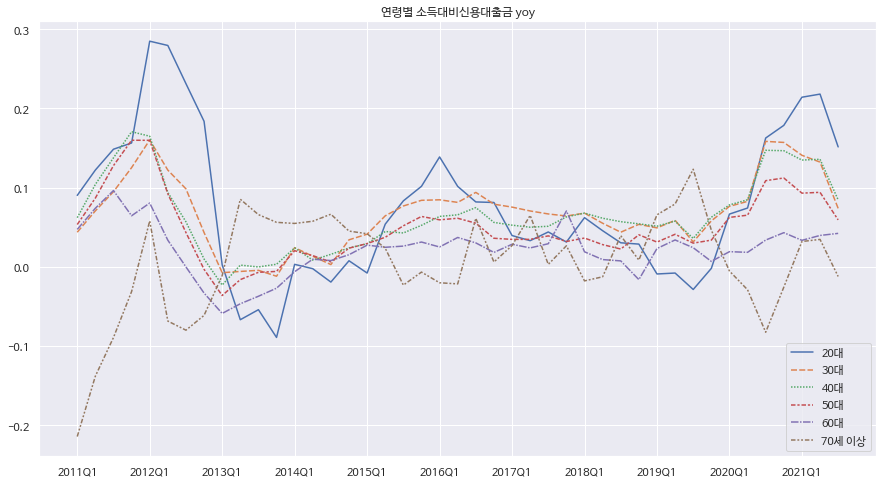

In [33]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_yoy)
ax.set_title('연령별 소득대비신용대출금 yoy')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [35]:
df_qoq = convert_to_qoq(df)

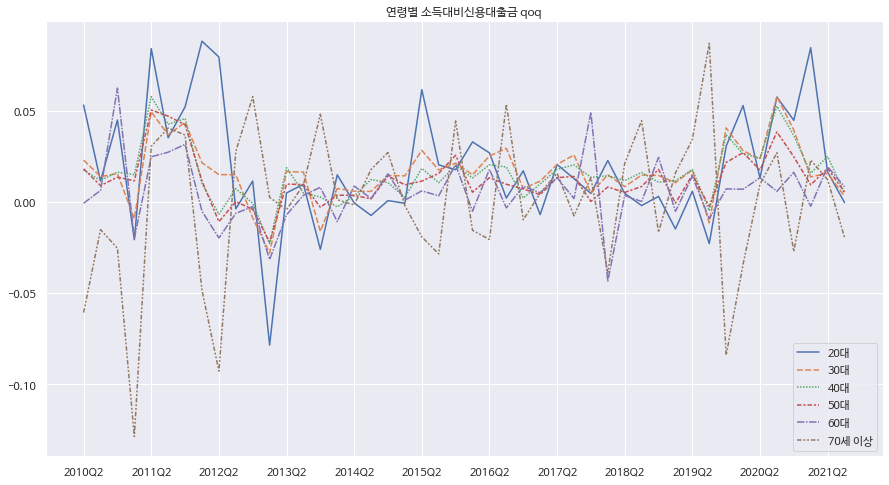

In [36]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_qoq)
ax.set_title('연령별 소득대비신용대출금 qoq')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

# 소득

In [ ]:
df_loan = pd.read_csv('data/house_loan_v2.csv')

In [ ]:
quarter_index = list(df_loan['기준분기'].unique())
age_list = list(df_loan['연령대'].unique())
income_level_list = list(df_loan['소득추정등급'].unique())

# 채무불이행

In [ ]:
df = pd.read_csv('data/default.csv')

In [ ]:
df

기준분기     연령대  ... 신용관리대상등록총금액<미적용, 금액, 십만원>  신용관리대상등록총금액<미적용, 등록자수, 명>
0     2010Q1     20대  ...                     18630                        196
1     2010Q1     20대  ...                       380                          5
2     2010Q1     20대  ...                      1324                          1
3     2010Q1     20대  ...                       372                          4
4     2010Q1     20대  ...                       484                          2
...      ...     ...  ...                       ...                        ...
9001  2021Q3  70세 이상  ...                      3702                         11
9002  2021Q3  70세 이상  ...                        51                          2
9003  2021Q3  70세 이상  ...                    118825                        187
9004  2021Q3  70세 이상  ...                     68069                        192
9005  2021Q3  70세 이상  ...                     16456                         45

[9006 rows x 6 columns]

In [ ]:
quater_list = list(df['기준분기'].unique())
gender_list = list(df['성별구분'].unique())
age_list = list(df['연령대'].unique())
income_level_list = list(df['소득추정등급'].unique())

## 신용관리대상등록금액

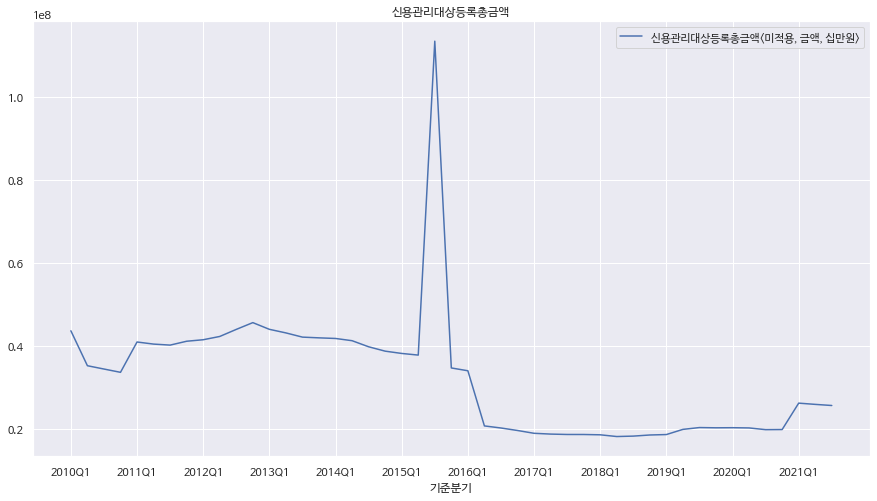

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df.groupby('기준분기').sum()[['신용관리대상등록총금액<미적용, 금액, 십만원>']])
ax.set_title('신용관리대상등록총금액')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

## 신용관리대상등록자

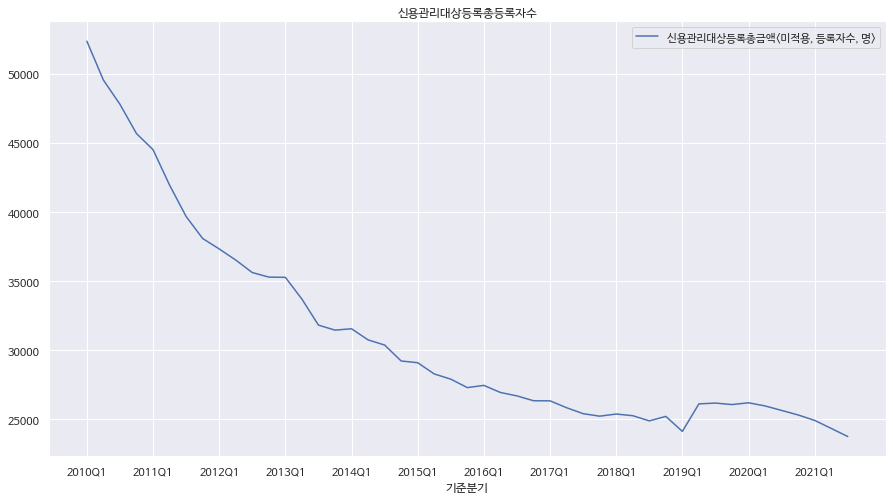

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df.groupby('기준분기').sum()[['신용관리대상등록총금액<미적용, 등록자수, 명>']])
ax.set_title('신용관리대상등록총등록자수')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [ ]:
total_default = pd.DataFrame(index=quater_list)
for age in age_list:
  total_default[age] = df[df['연령대'] == age].groupby('기준분기').sum()['신용관리대상등록총금액<미적용, 등록자수, 명>']

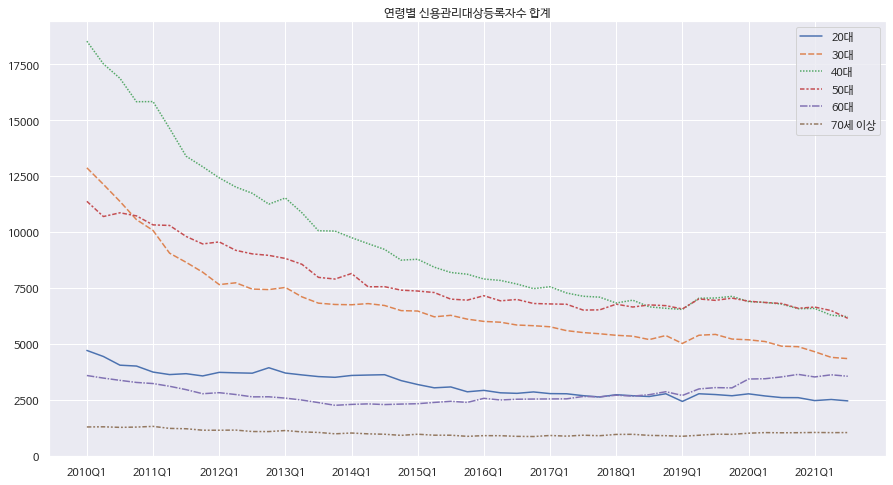

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=total_default)
ax.set_title('연령별 신용관리대상등록자수 합계')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [ ]:
total_default = pd.DataFrame(index=quater_list)
for gender in gender_list:
  total_default[gender] = df[df['성별구분'] == gender].groupby('기준분기').sum()['신용관리대상등록총금액<미적용, 등록자수, 명>']

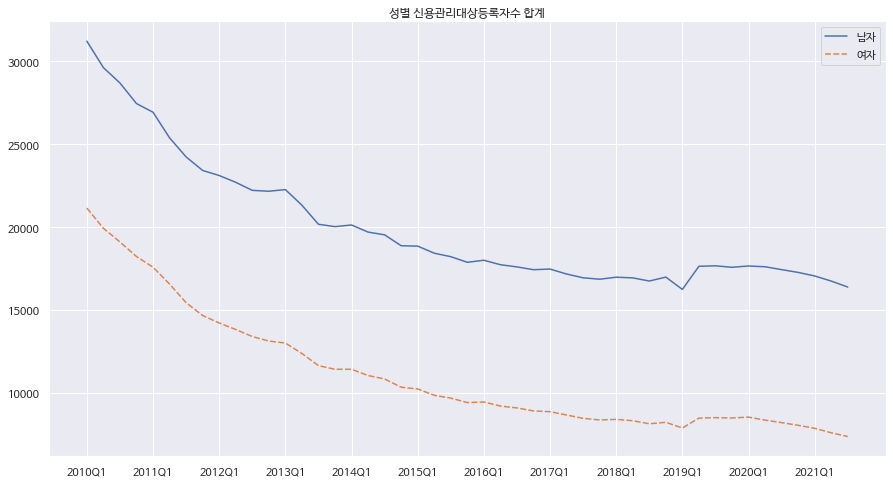

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=total_default)
ax.set_title('성별 신용관리대상등록자수 합계')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [ ]:
total_default = pd.DataFrame(index=quater_list)
for income_level in income_level_list:
  total_default[income_level] = df[df['소득추정등급'] == income_level].groupby('기준분기').sum()['신용관리대상등록총금액<미적용, 등록자수, 명>']

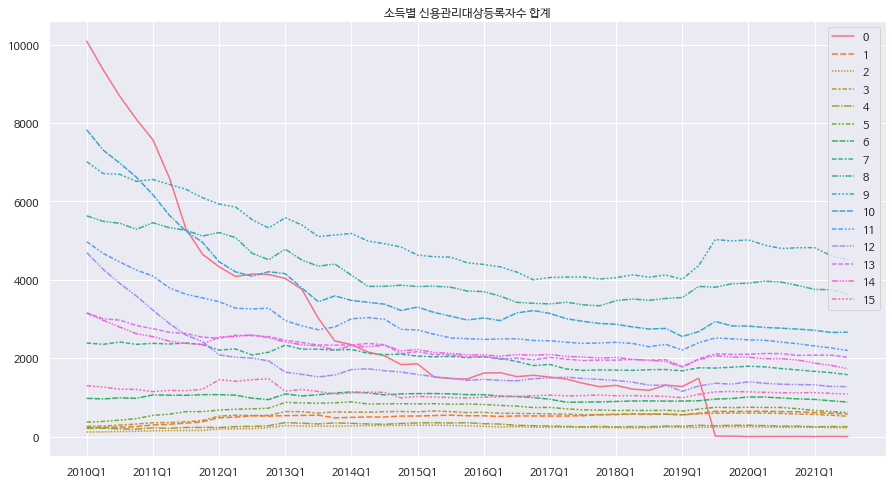

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=total_default)
ax.set_title('소득별 신용관리대상등록자수 합계')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

### 20대

In [ ]:
total_default = pd.DataFrame(index=quater_list)
for gender in gender_list:
  total_default[gender] = df[(df['연령대'] == '20대') & (df['성별구분'] == gender)].groupby('기준분기').sum()['신용관리대상등록총금액<미적용, 등록자수, 명>']

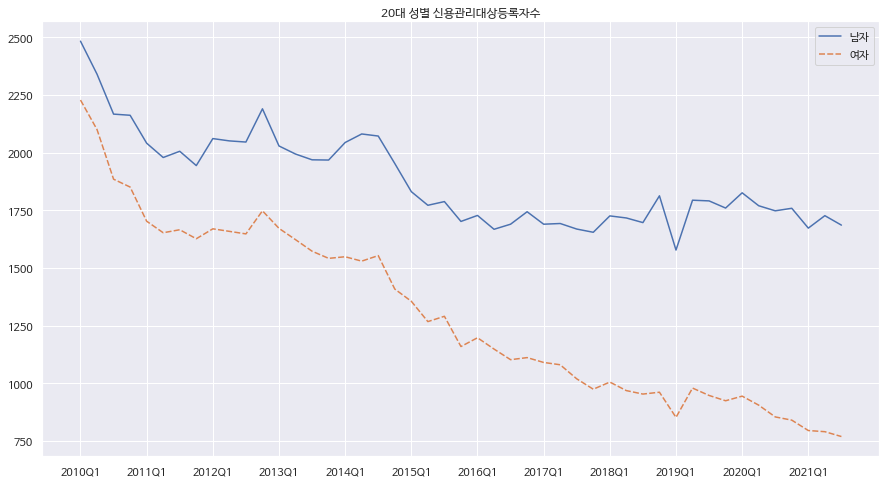

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=total_default)
ax.set_title('20대 성별 신용관리대상등록자수')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [ ]:
total_default = pd.DataFrame(index=quater_list)
for income_level in income_level_list:
  total_default[income_level] = df[(df['연령대'] == '20대') & (df['소득추정등급'] == income_level)].groupby('기준분기').sum()['신용관리대상등록총금액<미적용, 등록자수, 명>']

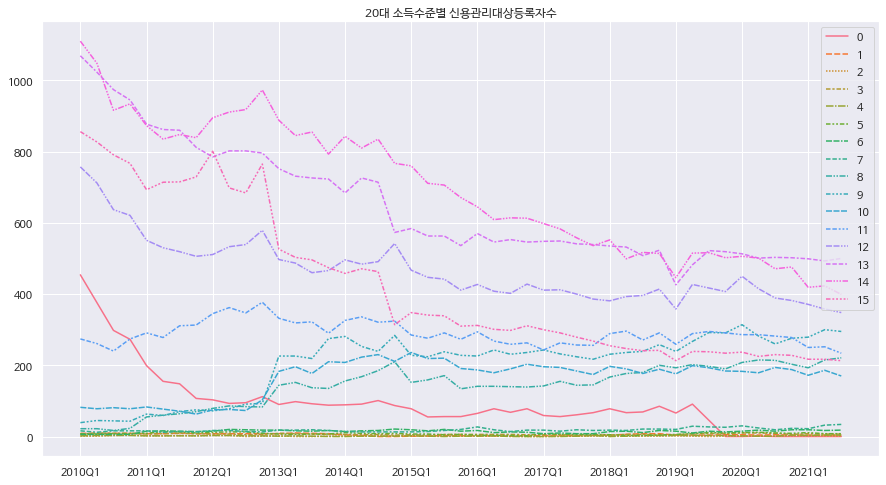

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=total_default)
ax.set_title('20대 소득수준별 신용관리대상등록자수')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

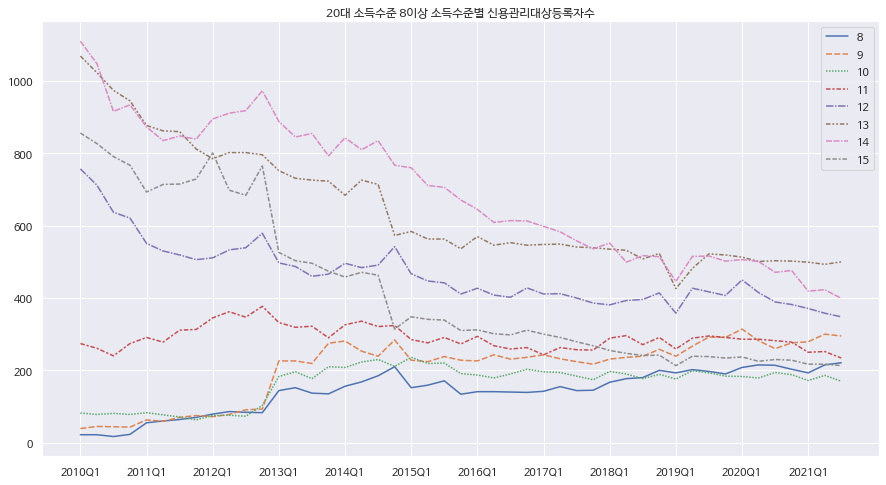

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=total_default[income_level_list[8:]])
ax.set_title('20대 소득수준 8이상 소득수준별 신용관리대상등록자수')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

In [ ]:
total_default = pd.DataFrame(index=quater_list)
total_default['하'] = df[(df['연령대'] == '20대') & (df['소득추정등급'] < 8)].groupby('기준분기').sum()['신용관리대상등록총금액<미적용, 등록자수, 명>']
total_default['중'] = df[(df['연령대'] == '20대') & (df['소득추정등급'].isin([8, 9, 10, 11]))].groupby('기준분기').sum()['신용관리대상등록총금액<미적용, 등록자수, 명>']
total_default['상'] = df[(df['연령대'] == '20대') & (df['소득추정등급'].isin([12, 13, 14, 15]))].groupby('기준분기').sum()['신용관리대상등록총금액<미적용, 등록자수, 명>']

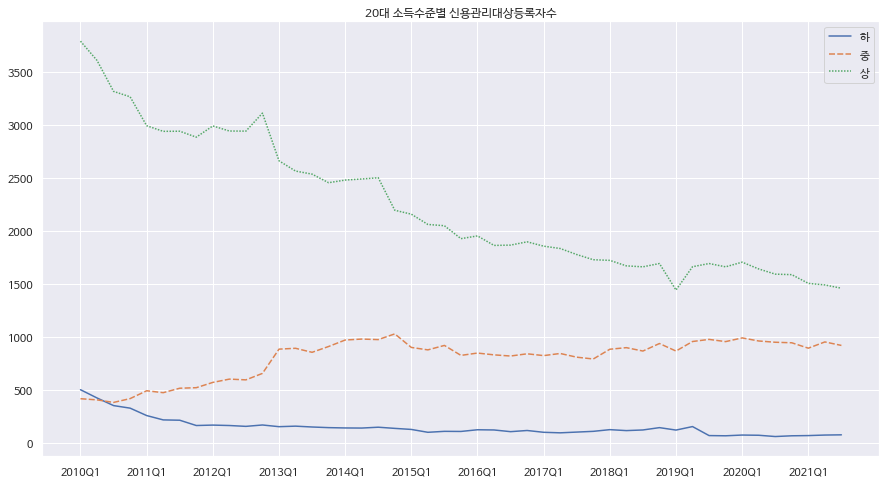

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=total_default)
ax.set_title('20대 소득수준별 신용관리대상등록자수')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

### 30대

In [ ]:
total_default = pd.DataFrame(index=quater_list)
for income_level in income_level_list:
  total_default[income_level] = df[(df['연령대'] == '30대') & (df['소득추정등급'] == income_level)].groupby('기준분기').sum()['신용관리대상등록총금액<미적용, 등록자수, 명>']

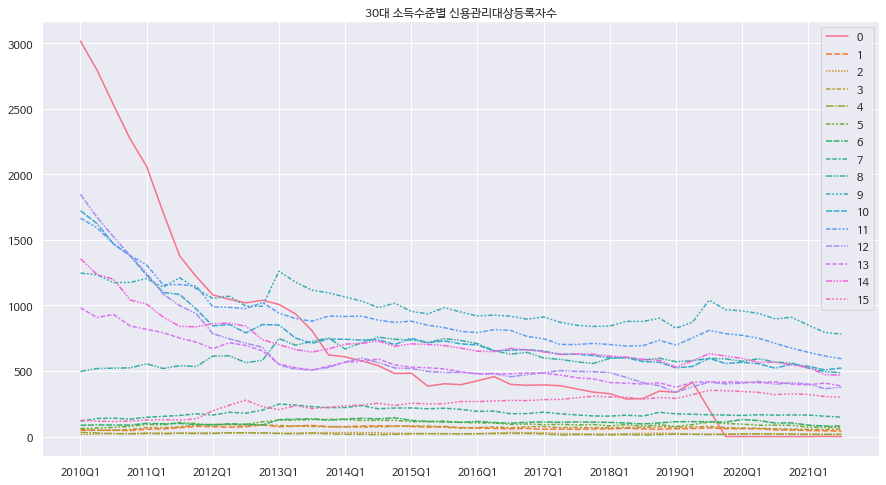

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=total_default)
ax.set_title('30대 소득수준별 신용관리대상등록자수')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

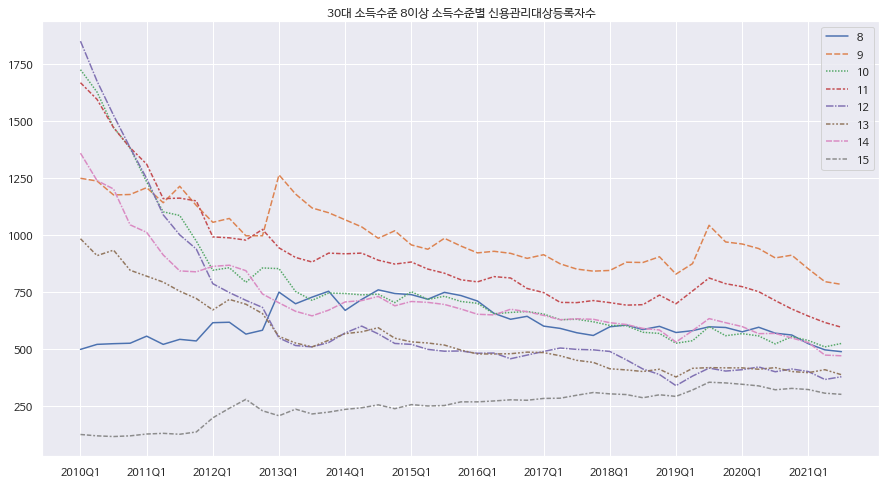

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=total_default[income_level_list[8:]])
ax.set_title('30대 소득수준 8이상 소득수준별 신용관리대상등록자수')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

### 40대 이상

In [ ]:
total_default = pd.DataFrame(index=quater_list)
for income_level in income_level_list:
  total_default[income_level] = df[(df['연령대'] != '20대') & (df['연령대'] != '30대') & (df['소득추정등급'] == income_level)].groupby('기준분기').sum()['신용관리대상등록총금액<미적용, 등록자수, 명>']

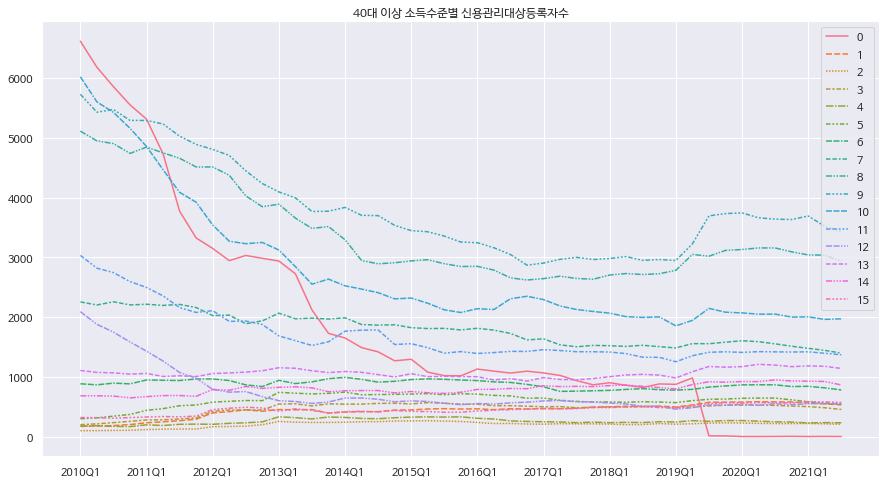

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=total_default)
ax.set_title('40대 이상 소득수준별 신용관리대상등록자수')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None

# 거시변수

In [ ]:
df = pd.read_csv('data/all_macro_data.csv', index_col=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)

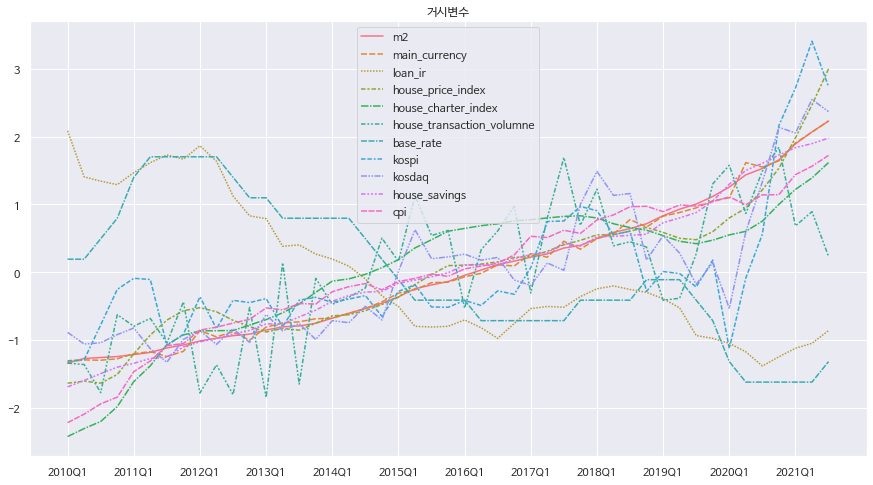

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df_scaled)
ax.set_title('거시변수')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 4 != 0:
        xticks[i].set_visible(False)
plt.show()
None